# Case Study  - Cyclistic bike-share analysis

# Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. 

# Question


How do annual members and casual riders use Cyclistic bikes differently? 

# Datasets

We have datasets available from April 2019 to March 2020, but they are organized differently each quarter. 
Our initial task is to standardize and consolidate all four datasets into a consistent and meaningful format.

In [634]:
#As We are using Python for Expolatory Data Analysis. Lets start we importing some of the libraries we will be using in this project.
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [635]:
#Creating function to import dataset (csv file)
def import_datasets(file_name):
    df = pd.read_csv(file_name)
    
    #columns mapping
    col_mapping = {'trip_id':'ride_id',
                       'bikeid':'rideable_type',
                       'start_time':'started_at',
                       'end_time':'ended_at',
                       'from_station_name':'start_station_name',
                       'from_station_id':'start_station_id',
                       'to_station_name':'end_station_name',
                       'to_station_id':'end_station_id',
                       'usertype':'membership_type',
                       '01 - Rental Details Rental ID':'ride_id',
                       '01 - Rental Details Bike ID':'rideable_type',
                       '01 - Rental Details Local Start Time':'started_at',
                       '01 - Rental Details Local End Time':'ended_at',
                       '03 - Rental Start Station Name':'start_station_name',
                       '03 - Rental Start Station ID':'start_station_id',
                       '02 - Rental End Station Name':'end_station_name',
                       '02 - Rental End Station ID':'end_station_id',
                       'User Type':'membership_type',
                       'member_casual':'membership_type'
                    }
    
    df.rename(columns = col_mapping, inplace = True)
        
        # Selecting only the columns that are primarily used for our analysis.
    df=df[[ 'ride_id','started_at','ended_at','rideable_type','start_station_name',
            'end_station_name','membership_type']]
    
    # Changing the datatype of 'ride_id' to string so that it can stack correctly across all dataframes.
    df[['ride_id','rideable_type']] = df[['ride_id','rideable_type']].astype(str)

    return df 

In [636]:
#Running Import function
q2_2019 = import_datasets(r"Divvy_Trips_2019_Q2.csv")
q3_2019 = import_datasets(r"Divvy_Trips_2019_Q3.csv")
q4_2019 = import_datasets(r"Divvy_Trips_2019_Q4.csv")
q1_2020 = import_datasets(r"Divvy_Trips_2020_Q1.csv")

# Expolatory Data Analysis Using Python

In [638]:
#Merging all four Dataframes
all_trips = pd.concat([q2_2019,q3_2019,q4_2019,q1_2020])
print(all_trips.shape)
print(all_trips.columns)

(3879822, 7)
Index(['ride_id', 'started_at', 'ended_at', 'rideable_type',
       'start_station_name', 'end_station_name', 'membership_type'],
      dtype='object')


In [639]:
all_trips.sample(5)

,ride_id,started_at,ended_at,rideable_type,start_station_name,end_station_name,membership_type
300197,25536376,2019-10-23 16:44:03,2019-10-23 17:08:39,778,LaSalle St & Illinois St,Burling St (Halsted) & Diversey Pkwy (Temp),Subscriber
680032,25937711,2019-12-25 10:53:26,2019-12-25 12:28:30,2941,Michigan Ave & 8th St,Michigan Ave & 8th St,Customer
189976,22401388,2019-04-22 15:08:39,2019-04-22 15:13:04,6210,Clinton St & Washington Blvd,Kingsbury St & Kinzie St,Subscriber
563745,22842414,2019-05-26 21:20:44,2019-05-26 21:29:55,5843,Damen Ave & Cullerton St,Wolcott Ave & Polk St,Subscriber
750420,23060517,2019-06-08 12:58:42,2019-06-08 13:19:59,2987,Clark St & Drummond Pl,Sheffield Ave & Kingsbury St,Subscriber


In [640]:
#Checking if there are any duplicates on dataset.
all_trips.duplicated().sum()

0

In [641]:
#Lets check any null values in a dataframe
all_trips.isna().sum()

ride_id               0
started_at            0
ended_at              0
rideable_type         0
start_station_name    0
end_station_name      1
membership_type       0
dtype: int64

We identified just one null value in the end_station_name column. However, since the ended_at column has no null values, we can proceed with our analysis. Next, let's review our DataFrame, focusing on the member_casual column. To better understand this column, we can start by examining the number of unique values it holds.

In [643]:
all_trips['membership_type'].nunique()

4

In [644]:
all_trips['membership_type'].unique().sum()

'SubscriberCustomermembercasual'

Since we have identified four distinct values in the member_casual column, 
let's standardize them by mapping "Subscriber" to "member" and "Customer" to "casual".

In [646]:
all_trips['membership_type'] = all_trips['membership_type'].replace({'Customer' : 'casual', 'member':'member', 'Subscriber':'member'})
all_trips['membership_type'] = all_trips['membership_type'].str.title()
all_trips['membership_type']

0         Member
1         Member
2         Member
3         Member
4         Member
           ...  
426882    Casual
426883    Member
426884    Casual
426885    Member
426886    Casual
Name: membership_type, Length: 3879822, dtype: object

In [647]:
all_trips['membership_type'].unique().sum()

'MemberCasual'

In [648]:
all_trips.dtypes

ride_id               object
started_at            object
ended_at              object
rideable_type         object
start_station_name    object
end_station_name      object
membership_type       object
dtype: object

In [649]:
#Coverting two given date columns to date format:
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])
all_trips['ended_at'] = pd.to_datetime(all_trips['ended_at'])

In [650]:
all_trips.dtypes

ride_id                       object
started_at            datetime64[ns]
ended_at              datetime64[ns]
rideable_type                 object
start_station_name            object
end_station_name              object
membership_type               object
dtype: object

In [651]:
#Calculating ride_length as duration between start and end time.
all_trips['ride_length'] =  all_trips['ended_at'] - all_trips['started_at'] 

In [652]:
all_trips.tail(5)

,ride_id,started_at,ended_at,rideable_type,start_station_name,end_station_name,membership_type,ride_length
426882,ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,docked_bike,HQ QR,HQ QR,Casual,0 days 00:00:01
426883,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,Rush St & Superior St,Sheridan Rd & Irving Park Rd,Member,0 days 00:48:08
426884,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,Clark St & Lincoln Ave,Ashland Ave & Division St,Casual,0 days 00:25:51
426885,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,Franklin St & Illinois St,Stetson Ave & South Water St,Member,0 days 00:10:33
426886,064EC7698E4FF9B3,2020-03-08 13:03:57,2020-03-08 13:32:27,docked_bike,Dearborn St & Erie St,Michigan Ave & Oak St,Casual,0 days 00:28:30


In [653]:
#converting ride_length to seconds for aggression.
all_trips['ride_length'] = all_trips['ride_length'].dt.total_seconds()

In [654]:
all_trips.head(5)

,ride_id,started_at,ended_at,rideable_type,start_station_name,end_station_name,membership_type,ride_length
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,Daley Center Plaza,Desplaines St & Kinzie St,Member,446.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,Wood St & Taylor St,Wabash Ave & Roosevelt Rd,Member,1048.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,LaSalle St & Jackson Blvd,Canal St & Madison St,Member,252.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,McClurg Ct & Illinois St,Kingsbury St & Kinzie St,Member,357.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,Halsted St & 18th St,Blue Island Ave & 18th St,Member,1007.0


In [655]:
print(all_trips['ride_length'].min())
print(all_trips['ride_length'].max())

-3382.0
9387024.0


Since some rides have a negative ride_length due to trip durations being recorded as negative, 
including several hundred instances where Divvy removed bikes from circulation for quality control reasons, we need to delete these rides.

In [657]:
# Selecting only rows with 0 or positive on ride_length column.
all_trips = all_trips[~ ((all_trips['ride_length'] < 0 ) | (all_trips['start_station_name'] == 'HQ QR'))]

In [658]:
#Extrating date components for further analysis
all_trips['hour'] = all_trips['started_at'].dt.hour
all_trips['date'] = all_trips['started_at'].dt.day
all_trips['day_of_the_week'] = (all_trips['started_at'].dt.day_of_week + 1) % 7 + 1 #Sunday is 1 and Saturday is 7
all_trips['name_of_the_day'] = all_trips['started_at'].dt.day_name()
all_trips['month'] = all_trips['started_at'].dt.month_name()
all_trips['year'] = all_trips['started_at'].dt.year

In [659]:
all_trips.head(3)

,ride_id,started_at,ended_at,rideable_type,start_station_name,end_station_name,membership_type,ride_length,hour,date,day_of_the_week,name_of_the_day,month,year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,Daley Center Plaza,Desplaines St & Kinzie St,Member,446.0,0,1,2,Monday,April,2019
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,Wood St & Taylor St,Wabash Ave & Roosevelt Rd,Member,1048.0,0,1,2,Monday,April,2019
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,LaSalle St & Jackson Blvd,Canal St & Madison St,Member,252.0,0,1,2,Monday,April,2019


# Visualization of Average Ride Duration (in Minutes) by Membership Type

In [661]:
#Average ride length for member and casual in minutes
ave_ride_length = (all_trips.groupby('membership_type')['ride_length'].mean() / 60).reset_index()
ave_ride_length

,membership_type,ride_length
0,Casual,59.212503
1,Member,14.167769


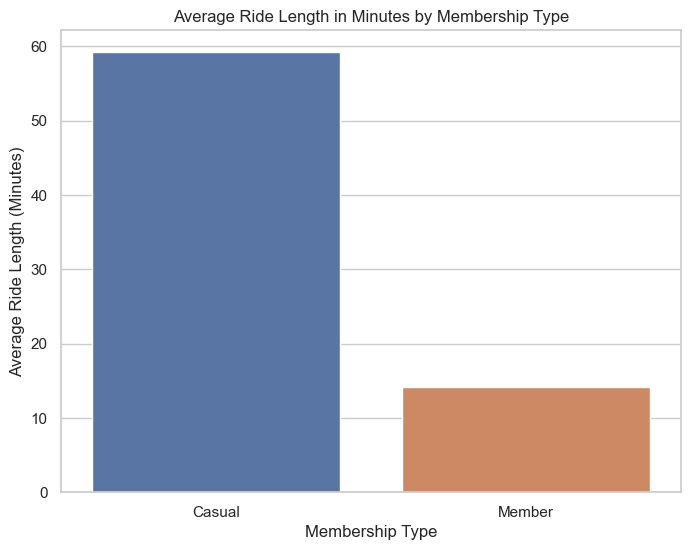

In [662]:
# Lets Visualize this with helps of Seaborn libraries
plt.figure(figsize = (8,6))
sns.barplot(x = 'membership_type', y = 'ride_length', hue = 'membership_type', data = ave_ride_length)

#Adding titles and labels
plt.title('Average Ride Length in Minutes by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

# Visualization of the Number of Rides Started Each Hour of the Day by Membership Type

In [664]:
ride_start_hour = pd.pivot_table(all_trips,
                                 columns = 'membership_type', 
                                 values = 'ride_id', 
                                 index = 'hour', 
                                 aggfunc = 'count', 
                                 fill_value = 0)
ride_start_hour

membership_type,Casual,Member
hour,,
0,8363,15749
1,5495,8967
2,3361,5230
3,1982,3546
4,1196,6686
5,2690,34443
6,6291,104094
7,13302,229602
8,22304,288164


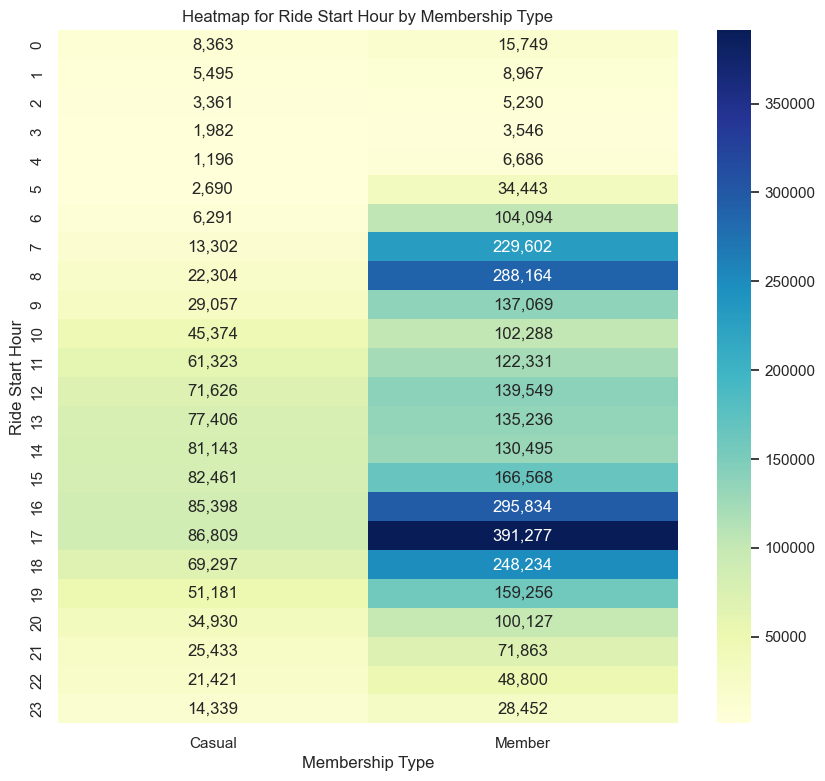

In [665]:
# Lets visualize this in Heatmap
plt.figure(figsize = (10,9))
sns.heatmap(ride_start_hour, annot = True, cmap = 'YlGnBu', fmt = ',.0f')

#Add titles and labels
plt.title('Heatmap for Ride Start Hour by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Ride Start Hour')
plt.show()

# Analysis on ride per day in a week compare with Membership Type

In [667]:

num_ride_day = all_trips.groupby(['name_of_the_day','membership_type'])['ride_id'].count().reset_index()

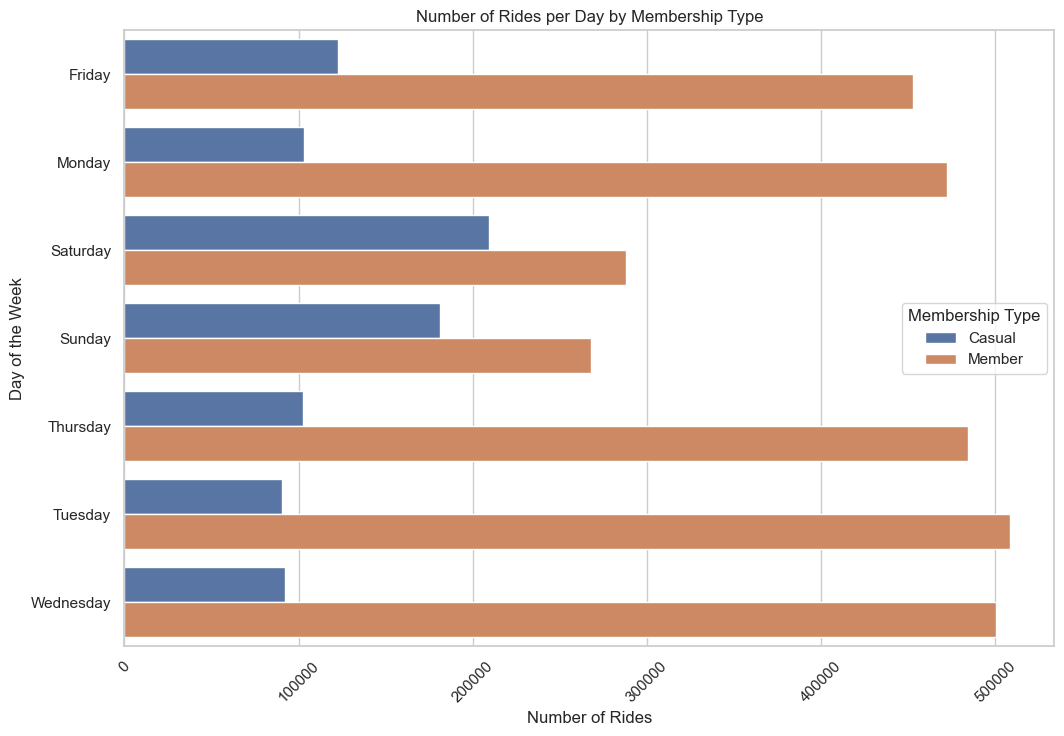

In [668]:

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(y='name_of_the_day', x='ride_id', hue='membership_type', data=num_ride_day, orient = 'h')
plt.title('Number of Rides per Day by Membership Type')
plt.ylabel('Day of the Week')
plt.xlabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Membership Type')
plt.show()


# Analysis of  Average Daily Rides Time Throughout the Week: Comparison Between Members and Casual Riders


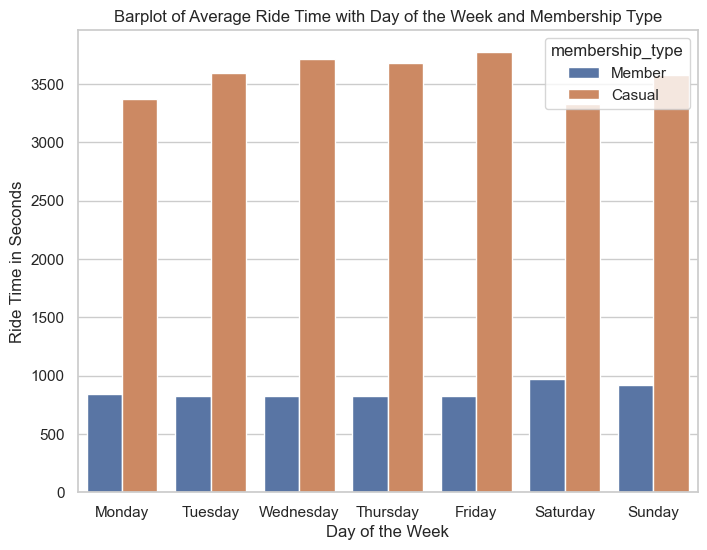

In [670]:
#Lets Visualize this using using barchart:
plt.figure(figsize = (8,6))
sns.barplot(all_trips, x = 'name_of_the_day', y = 'ride_length', hue = 'membership_type', errorbar = None)
#Add titles and labels
plt.title('Barplot of Average Ride Time with Day of the Week and Membership Type')
plt.xlabel('Day of the Week')
plt.ylabel('Ride Time in Seconds')
plt.show()

# Visualization of Ride Trends Throughout the Year

In [672]:
ave_ride_month = pd.pivot_table(all_trips, columns = 'membership_type', 
                                    index = 'month',
                                    values = 'ride_length', 
                                    aggfunc = 'mean',
                                    fill_value = 0).round(2)
ave_ride_month

membership_type,Casual,Member
month,,
April,3056.55,810.77
August,4020.45,971.13
December,3799.96,684.91
February,7997.16,768.40
January,9698.97,668.94
July,3587.03,986.00
June,2755.20,872.85
March,4250.22,860.06
May,3074.30,830.99


In [673]:
ave_ride_month = all_trips.groupby(['month','membership_type'])['ride_length'].mean().round(2).reset_index()
ave_ride_month

,month,membership_type,ride_length
0,April,Casual,3056.55
1,April,Member,810.77
2,August,Casual,4020.45
3,August,Member,971.13
4,December,Casual,3799.96
5,December,Member,684.91
6,February,Casual,7997.16
7,February,Member,768.40
8,January,Casual,9698.97
9,January,Member,668.94


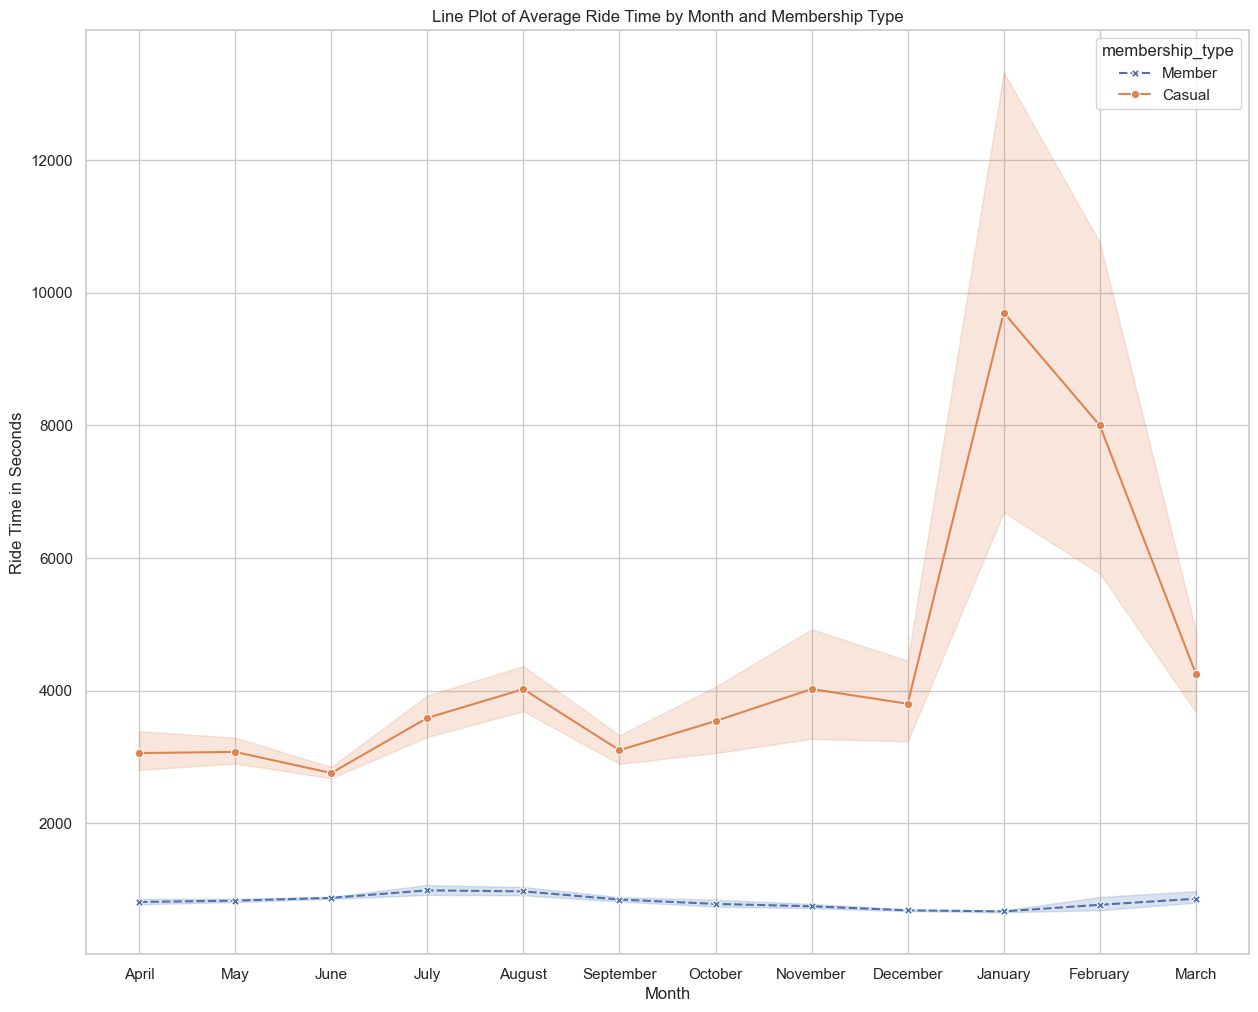

In [674]:
#Visualize this using using Linechart:
plt.figure(figsize = (15,12))
sns.lineplot(all_trips, x = 'month',  y = 'ride_length', hue ='membership_type', style = 'membership_type', markers = True, style_order = ['Casual','Member'])
#Add titles and labels
plt.title('Line Plot of Average Ride Time by Month and Membership Type')
plt.xlabel('Month')
plt.ylabel('Ride Time in Seconds')
plt.show()
